In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("..")
from scripts.utils import *

In [13]:
df_pop = pd.read_pickle("../data/objective/six-hump-camelback/schemata/01d842b2-f369-4681-b1d3-a29f6f9095a5/03-full-population.pickle")
df_holland = pd.read_pickle("../data/objective/six-hump-camelback/schemata/01d842b2-f369-4681-b1d3-a29f6f9095a5/04-hollands-schema-formulas.pickle")
# df = pd.read_pickle("../data/objective/six-hump-camelback/schemata/01d842b2-f369-4681-b1d3-a29f6f9095a5/03-sampled.pickle")
params = pd.read_csv("../data/configs/01d842b2-f369-4681-b1d3-a29f6f9095a5.csv")

In [15]:
print("Population dataset")
print("# rows: \t", df_pop.shape[0])
print("# columns: \t", df_pop.shape[1])

print("Schema dataset")
print("# rows: \t", df_holland.shape[0])
print("# columns: \t", df_holland.shape[1])

Population dataset
# rows: 	 163835000
# columns: 	 8
Schema dataset
# rows: 	 23539074
# columns: 	 11


## Schema analysis

In [26]:
# Identify schema with best fitness at end of run
print("Best average schema fitness at end of run")
df_holland[df_holland["generation"] == int(params["gmax"].iloc[0])-1]["fitness"].min()

Best average schema fitness at end of run


-1.0244303142373066

In [28]:
print("Schemas included in best fitness at end of run")
min_fitness = df_holland[df_holland["generation"] == int(params["gmax"].iloc[0])-1]["fitness"].min()
df = df_holland[df_holland["generation"] == int(params["gmax"].iloc[0])-1][df_holland["fitness"] == min_fitness]
df

Schemas included in best fitness at end of run


/var/folders/9c/2nfltbjn5ygb28w9j45bs_4w0000gn/T/ipykernel_23000/1339979222.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_holland[df_holland["generation"] == int(params["gmax"].iloc[0])-1][df_holland["fitness"] == min_fitness]


,generation,wildcard,defining_length,order,fitness,wildcard_count,average_fitness,rhs_selection,rhs_crossover,rhs_mutation,rhs_value
23243936,49,**00*0*101**01**,11,8,-1.02443,46,0.00939,6587.018660,0.733333,0.08,1229.576817
23243937,49,**00*0*101**01*0,13,9,-1.02443,46,0.00939,6587.018660,0.866667,0.09,285.437475
23243938,49,**00*0*101**010*,12,9,-1.02443,46,0.00939,6587.018660,0.800000,0.09,724.572053
23243939,49,**00*0*101**0100,13,10,-1.02443,46,0.00939,6587.018660,0.866667,0.10,219.567289
23243968,49,**00*0*101*101**,11,9,-1.02443,47,0.00939,6730.214718,0.733333,0.09,1189.004600
...,...,...,...,...,...,...,...,...,...,...,...
23525599,49,10000011010*010*,14,14,-1.02443,44,0.00939,6300.626544,0.933333,0.14,-462.045947
23525600,49,10000011010*0100,15,15,-1.02443,44,0.00939,6300.626544,1.000000,0.15,-945.093982
23525628,49,10000011010101**,13,14,-1.02443,44,0.00939,6300.626544,0.866667,0.14,-42.004177
23525629,49,10000011010101*0,15,15,-1.02443,44,0.00939,6300.626544,1.000000,0.15,-945.093982


In [33]:
# Six-hump camelback function
def obj_shc(solution):
    """Six-hump camelback objective function.

    Args:
        solution (_type_): _description_

    Returns:
        _type_: _description_
    """
    # need to validate solution format here. 
    x,y = solution

    z = (4 - 2.1 * pow(x, 2) + (pow(x, 4) / 3)) * pow(x, 2) + x * y + (-1*4 + 4 * pow(y, 2)) * pow(y, 2)
        
    return z

In [29]:
# Range of length and order of schema at end of run
print("Range of schema length at end of run")
print("Min: \t", df["defining_length"].min())
print("Max: \t", df["defining_length"].max())

print("Range of schema order at end of run")
print("Min: \t", df["order"].min())
print("Max: \t", df["order"].max())




Range of schema length at end of run
Min: 	 11
Max: 	 15
Range of schema order at end of run
Min: 	 8
Max: 	 15


Schema analysis of lowest order, lowest defining length schema with best fitness at end of GA

`**00*0*101**01**`

In [50]:
schema_example_df = df_pop[df_pop["wildcard"] == "**00*0*101**01**"]
print("Schema analysis: **00*0*101**01**")
print("Min x:", schema_example_df["x"].min())
print("Max x:", schema_example_df["x"].max())
print("Min y:", schema_example_df["y"].min())
print("Max x:", schema_example_df["y"].max())

schema_example_df

Schema analysis: **00*0*101**01**
Min x: -2.976470588235294
Max x: 1.5882352941176467
Min y: -0.9333333333333333
Max x: -0.14901960784313717


,generation,solution,x,y,fitness,wildcard,defining_length,order
54618142,0,1000101101110100,0.270588,-0.180392,0.107003,**00*0*101**01**,11,8
54618143,1,1000101101110100,0.270588,-0.180392,0.107003,**00*0*101**01**,11,8
54618144,2,0000101101110100,-2.741176,-0.180392,53.273517,**00*0*101**01**,11,8
54618145,2,0000101101110100,-2.741176,-0.180392,53.273517,**00*0*101**01**,11,8
54618146,3,1000001101010100,0.082353,-0.682353,-1.024430,**00*0*101**01**,11,8
...,...,...,...,...,...,...,...,...
54620097,49,1000001101010100,0.082353,-0.682353,-1.024430,**00*0*101**01**,11,8
54620098,49,1000001101010100,0.082353,-0.682353,-1.024430,**00*0*101**01**,11,8
54620099,49,1000001101010100,0.082353,-0.682353,-1.024430,**00*0*101**01**,11,8
54620100,49,1000001101010100,0.082353,-0.682353,-1.024430,**00*0*101**01**,11,8


In [65]:
df_example = df_holland[df_holland["wildcard"] == "**00*0*101**01**"]
df = pd.DataFrame({'count': df_example["wildcard_count"].values[1:], 'rhs_value': df_example["rhs_value"].values[:-1]})
df_example.head()




,generation,wildcard,defining_length,order,fitness,wildcard_count,average_fitness,rhs_selection,rhs_crossover,rhs_mutation,rhs_value
371679,0,**00*0*101**01**,11,8,0.107003,45,23.090099,953.256525,0.733333,0.08,177.941218
3046097,1,**00*0*101**01**,11,8,0.107003,37,3.788738,156.627706,0.733333,0.08,29.237172
5255762,2,**00*0*101**01**,11,8,53.273517,48,3.633414,4.123373,0.733333,0.08,0.769696
7239396,3,**00*0*101**01**,11,8,-0.858875,2,3.237439,49.403048,0.733333,0.08,9.221902
8905532,4,**00*0*101**01**,11,8,-0.773538,46,-0.635254,70.622037,0.733333,0.08,13.182780


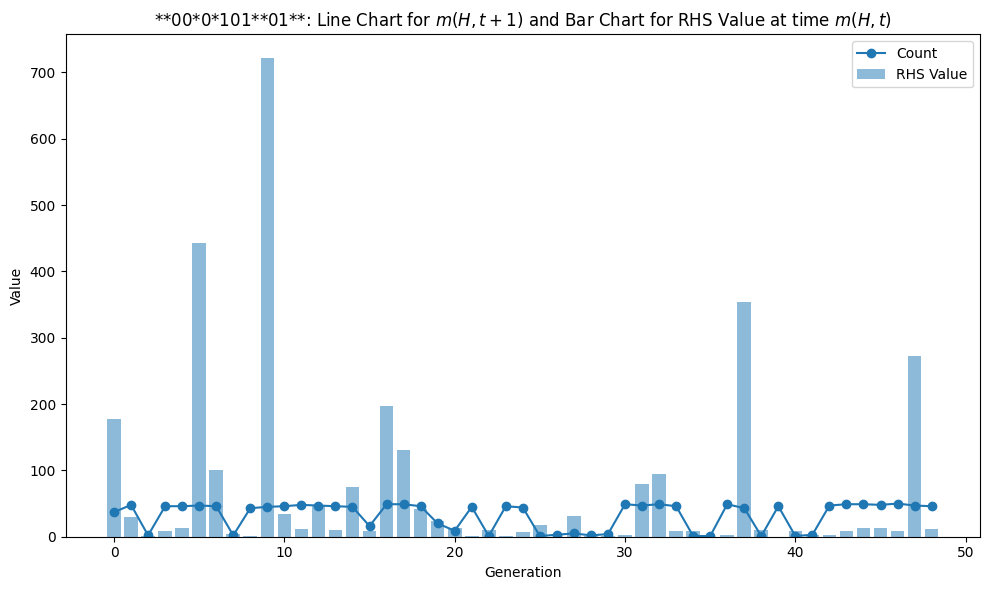

In [71]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line chart for the "count" value
ax.plot(df.index, df["count"], marker='o', linestyle='-', label='Count')

# Plot the bar chart for the "rhs_value"
ax.bar(df.index, df["rhs_value"], alpha=0.5, label='RHS Value')

# Set the x-axis label
ax.set_xlabel('Generation')

# Set the y-axis label
ax.set_ylabel('Value')

# Set the title
ax.set_title('**00*0*101**01**: Line Chart for $m(H,t+1)$ and Bar Chart for RHS Value at time $m(H,t)$')

# Add a legend
ax.legend()

# Adjust layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('../images/shc_schema_example_holland_eq.pdf', format='pdf')

# Show the plot
plt.show()


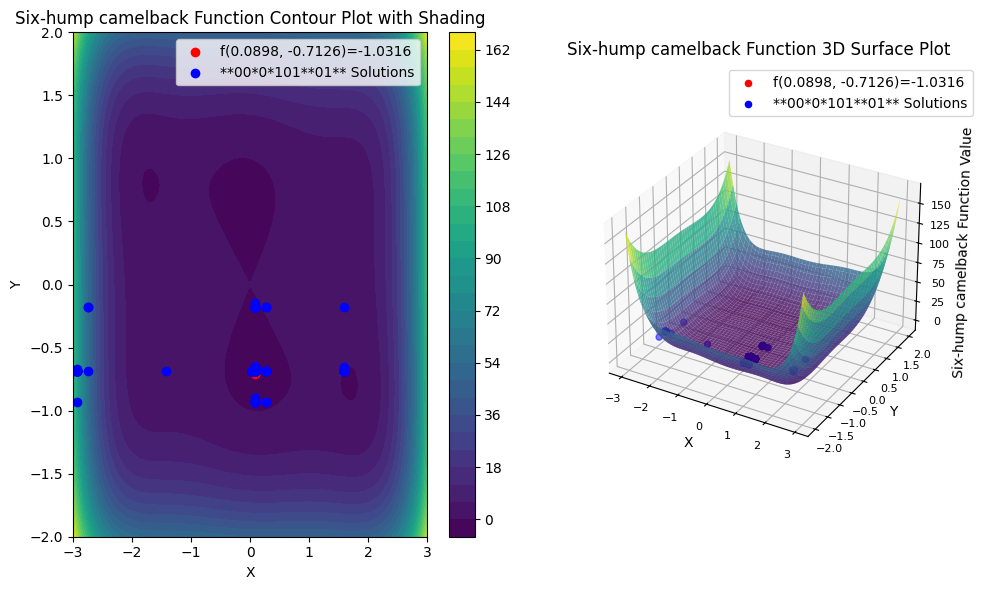

In [49]:
# Generate data points for visualization
x_values = np.linspace(-3, 3, 100)
y_values = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = obj_shc((X, Y))

# Highlight the point (0.0898, -0.7126) with a red dot
highlight_x = 0.0898
highlight_y = -0.7126
highlight_z = obj_shc((highlight_x, highlight_y))

# Create a 2D and 3D subplot side by side
fig = plt.figure(figsize=(10,6))

# Plot the 2D contour plot
ax = fig.add_subplot(1,2,1)
contour = ax.contourf(X, Y, Z, cmap='viridis', levels=30)
ax.scatter([highlight_x], [highlight_y], color='red', label='f(0.0898, -0.7126)=-1.0316')
# Show the range of solutions associated with the schema **00*0*101**01** over generations
schema_solution_x_values = schema_example_df["x"].values
schema_solution_y_values = schema_example_df["y"].values
schema_solution_z_values = schema_example_df["fitness"].values
ax.scatter([schema_solution_x_values], [schema_solution_y_values], color='blue', label='**00*0*101**01** Solutions')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Six-hump camelback Function Contour Plot with Shading')
ax.legend()
fig.colorbar(contour, ax=ax)

# # Plot the 3D surface plot with only 3D axes
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter([highlight_x], [highlight_y], [highlight_z], color='red', label='f(0.0898, -0.7126)=-1.0316')
# Show the range of solutions associated with the schema **00*0*101**01** over generations
ax.scatter([schema_solution_x_values], [schema_solution_y_values], color='blue', label='**00*0*101**01** Solutions')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Six-hump camelback Function Value')

# Adjust font size of tick labels
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)

ax.set_title('Six-hump camelback Function 3D Surface Plot')
ax.legend()
ax.set_box_aspect(aspect=None, zoom=0.8)

# Add a line from the point (1, 3) to the XY plane
ax.plot([highlight_x, highlight_x], [highlight_y, highlight_y], [highlight_z, 0], color='black', linestyle='dashed')

# Adjust layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('../images/shc_schema_example_combined_plots.pdf', format='pdf')

# Show the plot (optional)
plt.show()

Schema analysis of highest order, highest defining length schema with best fitness at the end of GA

`100000110101010*`

In [51]:
schema_example_df = df_pop[df_pop["wildcard"] == "100000110101010*"]
print("Schema analysis: 100000110101010*")
print("Min x:", schema_example_df["x"].min())
print("Max x:", schema_example_df["x"].max())
print("Min y:", schema_example_df["y"].min())
print("Max x:", schema_example_df["y"].max())

schema_example_df

Schema analysis: 100000110101010*
Min x: 0.08235294117647074
Max x: 0.08235294117647074
Min y: -0.6823529411764706
Max x: -0.6666666666666667


,generation,solution,x,y,fitness,wildcard,defining_length,order
111577172,3,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
111577173,5,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
111577174,5,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
111577175,6,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
111577176,6,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
...,...,...,...,...,...,...,...,...
111578960,49,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
111578961,49,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
111578962,49,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15
111578963,49,1000001101010100,0.082353,-0.682353,-1.02443,100000110101010*,14,15


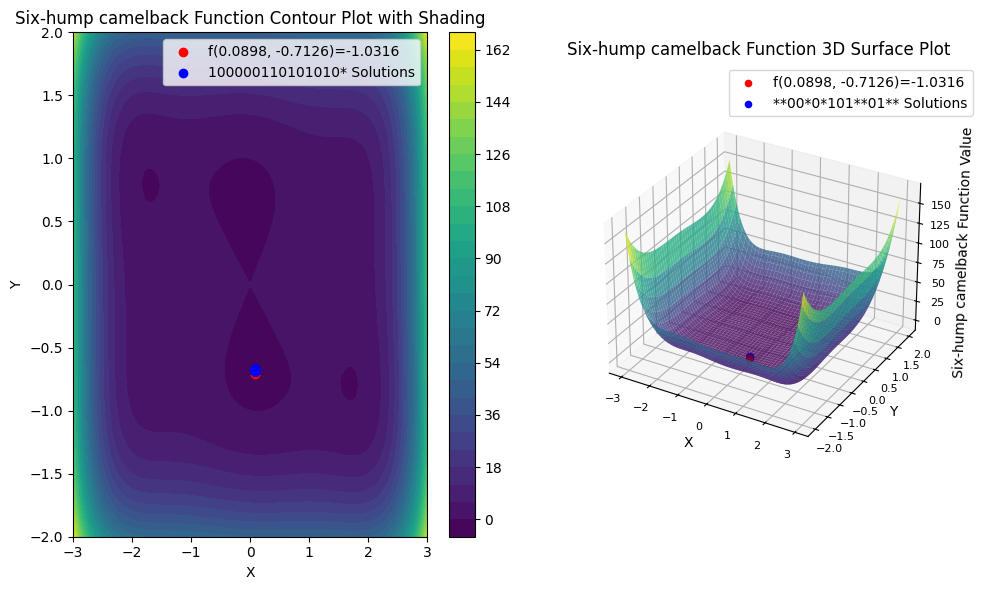

In [53]:
# Generate data points for visualization
x_values = np.linspace(-3, 3, 100)
y_values = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = obj_shc((X, Y))

# Highlight the point (0.0898, -0.7126) with a red dot
highlight_x = 0.0898
highlight_y = -0.7126
highlight_z = obj_shc((highlight_x, highlight_y))

# Create a 2D and 3D subplot side by side
fig = plt.figure(figsize=(10,6))

# Plot the 2D contour plot
ax = fig.add_subplot(1,2,1)
contour = ax.contourf(X, Y, Z, cmap='viridis', levels=30)
ax.scatter([highlight_x], [highlight_y], color='red', label='f(0.0898, -0.7126)=-1.0316')
# Show the range of solutions associated with the schema **00*0*101**01** over generations
schema_solution_x_values = schema_example_df["x"].values
schema_solution_y_values = schema_example_df["y"].values
schema_solution_z_values = schema_example_df["fitness"].values
ax.scatter([schema_solution_x_values], [schema_solution_y_values], color='blue', label='100000110101010* Solutions')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Six-hump camelback Function Contour Plot with Shading')
ax.legend()
fig.colorbar(contour, ax=ax)

# # Plot the 3D surface plot with only 3D axes
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter([highlight_x], [highlight_y], [highlight_z], color='red', label='f(0.0898, -0.7126)=-1.0316')
# Show the range of solutions associated with the schema **00*0*101**01** over generations
ax.scatter([schema_solution_x_values], [schema_solution_y_values], color='blue', label='**00*0*101**01** Solutions')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Six-hump camelback Function Value')

# Adjust font size of tick labels
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='z', labelsize=8)

ax.set_title('Six-hump camelback Function 3D Surface Plot')
ax.legend()
ax.set_box_aspect(aspect=None, zoom=0.8)

# Add a line from the point (1, 3) to the XY plane
ax.plot([highlight_x, highlight_x], [highlight_y, highlight_y], [highlight_z, 0], color='black', linestyle='dashed')

# Adjust layout
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('../images/shc_schema_example_high_order_high_length_combined_plots.pdf', format='pdf')

# Show the plot (optional)
plt.show()

In [7]:
average_fitness_pop = df.groupby('generation')['fitness'].mean()
average_fitness_pop_df = pd.DataFrame({'generation': average_fitness_pop.index, 'average_fitness': average_fitness_pop.values})


,seed,n,Pc,Pm,gmax,nbits,xycutpoint,objective
0,289908,50,1.0,0.01,50,16,8,six-hump camelback


/var/folders/9c/2nfltbjn5ygb28w9j45bs_4w0000gn/T/ipykernel_18915/1637693790.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  holland_eq_df["rhs_crossover"] = holland_eq_df.apply(lambda x: (Pc * x["defining_length"] / (int(l) - 1)) , axis=1)


: 

In [45]:
Pc

0    1.0
Name: Pc, dtype: float64

In [17]:
avg_population_fitness = np.average(generation_0["fitness"])
print("Population fitness: ", avg_population_fitness)

for w in generation_0["wildcard"].unique():
    print("Wildcard: ", w, " | defining length: ", np.average(generation_0[generation_0["wildcard"] == w]["defining_length"]), " | order: ", np.average(generation_0[generation_0["wildcard"] == w]["order"]))
    avg_wildcard_schema_fitness = np.average(generation_0[generation_0["wildcard"] == w]["fitness"])
    print("Wildcard fitness: ", avg_wildcard_schema_fitness)
    print("rhs selection:", avg_population_fitness / avg_wildcard_schema_fitness)

Population fitness:  21.52156274638076
Wildcard:  0000*11**01***1*  | defining length:  14.0  | order:  9.0
Wildcard fitness:  71.2735760217718
rhs selection: 0.30195710595195346
Wildcard:  ******11**1*0***  | defining length:  6.0  | order:  4.0
Wildcard fitness:  0.10700340961998595
rhs selection: 201.12969131369616
Wildcard:  *0*10*1*0**01100  | defining length:  14.0  | order:  10.0
Wildcard fitness:  30.174570550607037
rhs selection: 0.7132350967608982
Wildcard:  01*110*1**10*100  | defining length:  15.0  | order:  11.0
Wildcard fitness:  0.6524461833634891
rhs selection: 32.9859585283078
Wildcard:  1***10*0*******1  | defining length:  15.0  | order:  5.0
Wildcard fitness:  0.6859542272975151
rhs selection: 31.374633889450955
Wildcard:  *1*101*1**1*0011  | defining length:  14.0  | order:  10.0
Wildcard fitness:  54.86514437054259
rhs selection: 0.3922629383972935
Wildcard:  ****1*0*****01*0  | defining length:  11.0  | order:  5.0
Wildcard fitness:  0.6524461833634891
rhs selec

In [5]:
for g in range(50):
    print("generation: ", g, " : ", df[df["generation"] == g]["fitness"].max() - df[df["generation"] == g]["fitness"].min())

generation:  0  :  122.69345797068459
generation:  1  :  39.73654446671959
generation:  2  :  54.24859390091626
generation:  3  :  70.4179813346777
generation:  4  :  1.9004959138434094
generation:  5  :  67.03339169747602
generation:  6  :  6.765624067287355
generation:  7  :  92.35696091436719
generation:  8  :  92.54821062204032
generation:  9  :  21.880968443302717
generation:  10  :  6.480054251750975
generation:  11  :  92.35696091436719
generation:  12  :  6.480054251750975
generation:  13  :  92.35696091436719
generation:  14  :  21.880968443302717
generation:  15  :  1.023341839320881
generation:  16  :  71.57735442647504
generation:  17  :  21.880968443302717
generation:  18  :  6.480054251750975
generation:  19  :  1.3409830681762527
generation:  20  :  1.3409830681762527
generation:  21  :  92.35696091436719
generation:  22  :  54.80457145274902
generation:  23  :  6.480054251750975
generation:  24  :  92.35696091436719
generation:  25  :  1.3409830681762527
generation:  26

In [7]:
df[df["wildcard"] == "10011101010001**"]

,generation,solution,x,y,fitness,wildcard
2,0,1001110101000100,0.694118,-0.933333,0.380054,10011101010001**
3669906,1,1001110101000110,0.694118,-0.901961,0.244149,10011101010001**
4652916,1,1001110101000100,0.694118,-0.933333,0.380054,10011101010001**
8716024,2,1001110101000110,0.694118,-0.901961,0.244149,10011101010001**


In [16]:
# Sort by 'avg_fitness' and take the top 10
top_schemas = df.sort_values('avg_fitness',ascending=True).groupby(["generation", 'schema']).head(10)

# Plot 'avg_fitness' for each schema over generations
# for schema in top_schemas.index:
#     df.loc[df['schema'] == schema].plot(y='avg_fitness', label=schema)

# plt.xlabel('Generation')
# plt.ylabel('Average Fitness')
# plt.title('Top 10 Schema Groups Average Fitness Over Generations')
# plt.legend()
# plt.show()

In [22]:
top_schemas.index.names
print(df[df.index.isin([23], level="generation")])

                          sum_fitness  avg_fitness  count
generation schema                                        
23         01110101110*  15479.577223   159.583270     97
           0111010111*0  15479.577223   159.583270     97
           0111010111**  15479.577223   159.583270     97
           011101011*00  15479.577223   159.583270     97
           011101011*0*  15479.577223   159.583270     97
...                               ...          ...    ...
           *****0***1**    528.666667   176.222222      3
           *****0****00    528.666667   176.222222      3
           *****0****0*    528.666667   176.222222      3
           *****0*****0    528.666667   176.222222      3
           *****0******    528.666667   176.222222      3

[6141 rows x 3 columns]
